In [40]:
## K-Means practice
## https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

##
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [5]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [11]:
X.shape

(300, 2)

Text(0, 0.5, 'Y1')

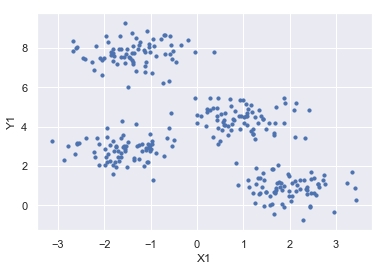

In [19]:
plt.scatter(X[:,0], X[:, 1], s=10)
plt.xlabel("X1", )
plt.ylabel("Y1")

In [24]:
kmeans = KMeans(n_clusters=4)

In [25]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
kmeans.inertia_

212.00599621083478

In [67]:
?kmeans.predict

In [27]:
y_kmeans = kmeans.predict(X)

In [28]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

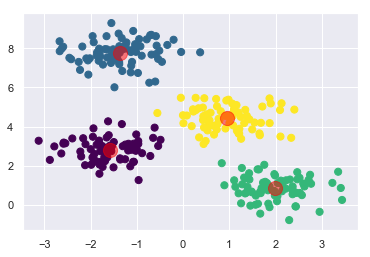

In [39]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],centers[:, 1], c="red", alpha=0.5, s=200)

In [35]:
centers

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [41]:
type(X)

numpy.ndarray

In [49]:
np_pd_dataframe = pd.DataFrame(data = X[1:])
np_pd_dataframe.to_csv("numpyGeneratedKMneas_data.txt", sep = "\t", encoding='utf-8', index=False, header=False)

In [59]:
## determine number of clusters for K-means
## elbow method
## https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

my_df = pd.read_csv("numpyGeneratedKMneas_data.txt", header=None, sep = "\t")


In [62]:
## implement elbow method
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(my_df)
    sum_of_squared_distances.append(km.inertia_)

In [63]:
sum_of_squared_distances

[2808.0587879667773,
 1190.3358037781927,
 544.0047225683808,
 209.04435641849068,
 185.8682198708402,
 167.07833544716672,
 150.89521007464998,
 134.33990038541504,
 122.53712095346899]

Text(0.5, 1.0, 'Elbow method')

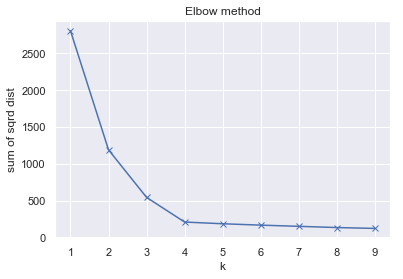

In [65]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel("k")
plt.ylabel("sum of sqrd dist")
plt.title("Elbow method")

In [ ]:
## ofcourse,we already know that 4 is a good number
## above implementation is to learn how to interpret elbow method results